In [9]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPool2D
import matplotlib.pyplot as plt

In [2]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    'train',
    shuffle=True,
    image_size=(224,224),
    batch_size=32
    )

Found 4955 files belonging to 50 classes.


In [3]:
class_names = dataset.class_names
class_names

['adonis',
 'american snoot',
 'an 88',
 'banded peacock',
 'beckers white',
 'black hairstreak',
 'cabbage white',
 'chestnut',
 'clodius parnassian',
 'clouded sulphur',
 'copper tail',
 'crecent',
 'crimson patch',
 'eastern coma',
 'gold banded',
 'great eggfly',
 'grey hairstreak',
 'indra swallow',
 'julia',
 'large marble',
 'malachite',
 'mangrove skipper',
 'metalmark',
 'monarch',
 'morning cloak',
 'orange oakleaf',
 'orange tip',
 'orchard swallow',
 'painted lady',
 'paper kite',
 'peacock',
 'pine white',
 'pipevine swallow',
 'purple hairstreak',
 'question mark',
 'red admiral',
 'red spotted purple',
 'scarce swallow',
 'silver spot skipper',
 'sixspot burnet',
 'skipper',
 'sootywing',
 'southern dogface',
 'straited queen',
 'two barred flasher',
 'ulyses',
 'viceroy',
 'wood satyr',
 'yellow swallow tail',
 'zebra long wing']

In [4]:
img_height = 224
img_width = 224
batch_size = 1

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'train',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)



test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'test',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=1)

Found 4955 files belonging to 50 classes.
Found 250 files belonging to 50 classes.


In [5]:
resnet_model = ResNet50(include_top=False,weights="imagenet")
x = resnet_model.output
x = GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dense(512,activation='relu')(x)
res = tf.keras.layers.Dense(50, activation="softmax")(x)

# generate our model

model = Model(inputs=resnet_model.input, outputs=res)

# will not retrain weights

for layer in resnet_model.layers:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

hist = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=15,
    verbose=1,
).history

model.summary()

Epoch 1/15
4955/4955 [==============================] - 124s 23ms/step - loss: 1.4467 - accuracy: 0.6295 - val_loss: 0.4967 - val_accuracy: 0.8680
Epoch 2/15
4955/4955 [==============================] - 136s 28ms/step - loss: 0.4289 - accuracy: 0.8823 - val_loss: 0.3013 - val_accuracy: 0.9160
Epoch 3/15
4955/4955 [==============================] - 136s 27ms/step - loss: 0.2494 - accuracy: 0.9346 - val_loss: 0.2423 - val_accuracy: 0.9320
Epoch 4/15
4955/4955 [==============================] - 146s 30ms/step - loss: 0.1563 - accuracy: 0.9655 - val_loss: 0.2224 - val_accuracy: 0.9440
Epoch 5/15
4955/4955 [==============================] - 148s 30ms/step - loss: 0.1066 - accuracy: 0.9798 - val_loss: 0.2000 - val_accuracy: 0.9440
Epoch 6/15
4955/4955 [==============================] - 136s 28ms/step - loss: 0.0742 - accuracy: 0.9865 - val_loss: 0.2037 - val_accuracy: 0.9440
Epoch 7/15
4955/4955 [==============================] - 138s 28ms/step - loss: 0.0537 - accuracy: 0.9927 - val_loss: 0

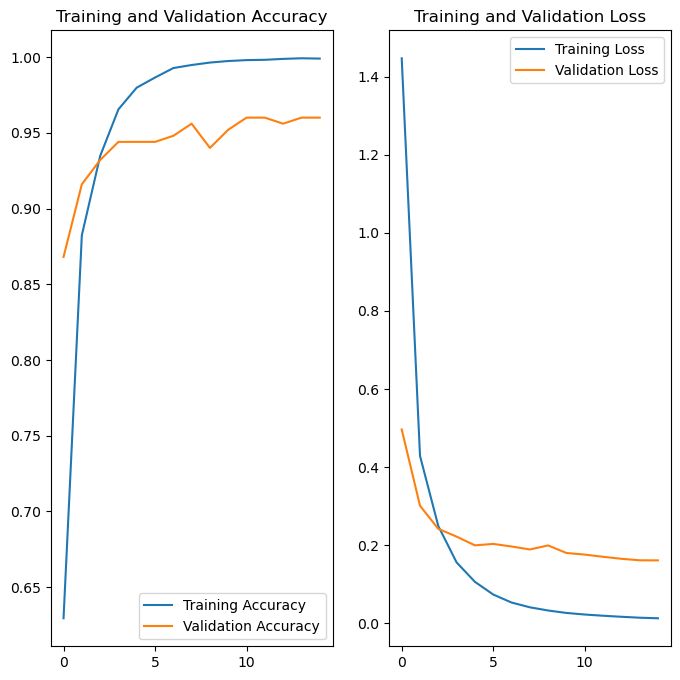

In [10]:
acc= hist['accuracy']
val_acc= hist['val_accuracy']

loss= hist['loss']
val_loss= hist['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(15), acc, label='Training Accuracy')
plt.plot(range(15), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(15), loss, label='Training Loss')
plt.plot(range(15), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 1s 845ms/step
This image most likely belongs to gold banded 


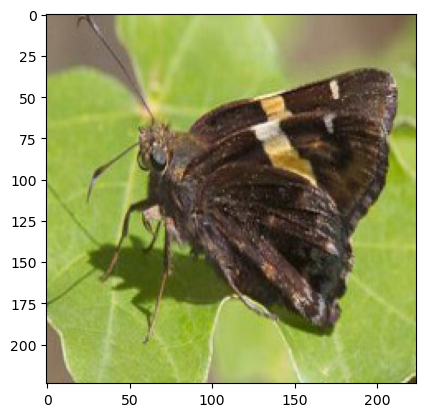

In [17]:
img = tf.keras.preprocessing.image.load_img('C:\\Users\\TESS\\Downloads\\3.jpg',
                                            target_size=(img_height, img_width))
img_array = tf.expand_dims(tf.keras.preprocessing.image.img_to_array(img), 0)

score = tf.nn.softmax(model.predict(img_array))
print("This image most likely belongs to {} ".format(class_names[np.argmax(score)]))
plt.imshow(img)